In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("County_Health_Rankings.csv")
df

,State,County,State code,County code,Year span,Measure name,Measure id,Numerator,Denominator,Raw value,Confidence Interval Lower Bound,Confidence Interval Upper Bound,Data Release Year,fipscode
0,US,United States,0.0,0.0,2003-2005,Violent crime rate,43.0,1328750.667,274877117.0,483.398066,NaN,NaN,NaN,0.0
1,US,United States,0.0,0.0,2004-2006,Violent crime rate,43.0,1340928.667,277612778.5,483.021233,NaN,NaN,NaN,0.0
2,US,United States,0.0,0.0,2005-2007,Violent crime rate,43.0,1355853.167,280407694.7,483.529230,NaN,NaN,2010.0,0.0
3,US,United States,0.0,0.0,2006-2008,Violent crime rate,43.0,1366928.333,287614567.7,475.263942,NaN,NaN,2011.0,0.0
4,US,United States,0.0,0.0,2007-2009,Violent crime rate,43.0,1339439.333,292576281.2,457.808585,NaN,NaN,2012.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303859,WY,Weston County,56.0,45.0,2007,Daily fine particulate matter,125.0,NaN,NaN,9.370000,NaN,NaN,NaN,56045.0
303860,WY,Weston County,56.0,45.0,2008,Daily fine particulate matter,125.0,NaN,NaN,7.450000,NaN,NaN,2013.0,56045.0
303861,WY,Weston County,56.0,45.0,2009,Daily fine particulate matter,125.0,NaN,NaN,12.770000,NaN,NaN,NaN,56045.0
303862,WY,Weston County,56.0,45.0,2010,Daily fine particulate matter,125.0,NaN,NaN,12.110000,NaN,NaN,NaN,56045.0


In [6]:
df.columns

Index(['State', 'County', 'State code', 'County code', 'Year span',
       'Measure name', 'Measure id', 'Numerator', 'Denominator', 'Raw value',
       'Confidence Interval Lower Bound', 'Confidence Interval Upper Bound',
       'Data Release Year', 'fipscode'],
      dtype='object')

In [7]:
df.isnull().sum()

State                                   6
County                                  6
State code                              4
County code                             4
Year span                             474
Measure name                          474
Measure id                            474
Numerator                           89788
Denominator                        119085
Raw value                           13908
Confidence Interval Lower Bound    114452
Confidence Interval Upper Bound    114452
Data Release Year                  153735
fipscode                             9581
dtype: int64

In [8]:
df.fillna(0,inplace=True)

In [9]:
df.isnull().sum()

State                              0
County                             0
State code                         0
County code                        0
Year span                          0
Measure name                       0
Measure id                         0
Numerator                          0
Denominator                        0
Raw value                          0
Confidence Interval Lower Bound    0
Confidence Interval Upper Bound    0
Data Release Year                  0
fipscode                           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303864 entries, 0 to 303863
Data columns (total 14 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   State                            303864 non-null  object 
 1   County                           303864 non-null  object 
 2   State code                       303864 non-null  float64
 3   County code                      303864 non-null  float64
 4   Year span                        303864 non-null  object 
 5   Measure name                     303864 non-null  object 
 6   Measure id                       303864 non-null  float64
 7   Numerator                        303864 non-null  float64
 8   Denominator                      303864 non-null  float64
 9   Raw value                        303864 non-null  float64
 10  Confidence Interval Lower Bound  303864 non-null  float64
 11  Confidence Interval Upper Bound  303864 non-null  float64
 12  Da

Questions

###Descriptive Analysis

1)What are the top 3 countries with highest Raw Value?

Average Raw value of a specific measures across all ountries and years by County
Lake and Peninsula Borough    32810.4
Buffalo County                32053.9
Mellette County               28433.3
Name: Raw value, dtype: float64


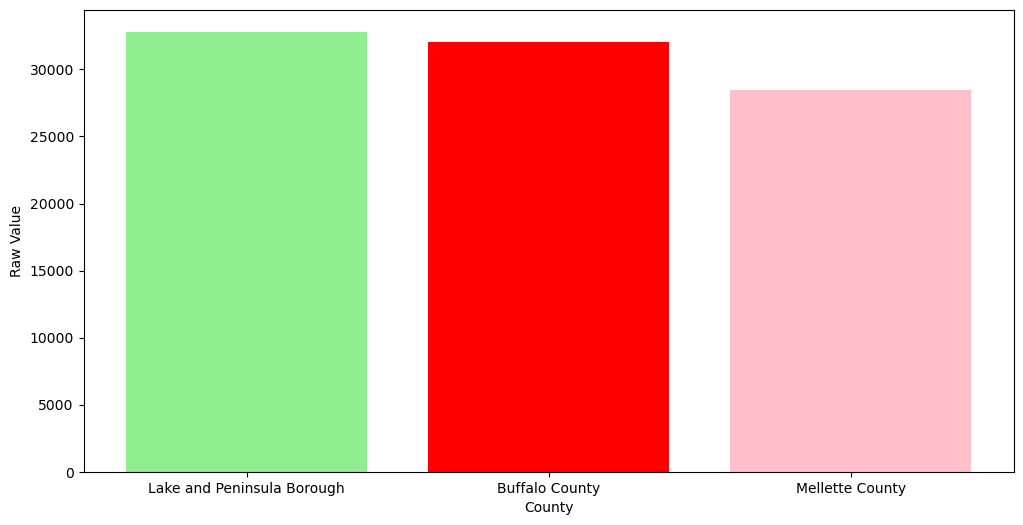

In [11]:
avg_raw_value=df.groupby('County')['Raw value'].max()
avg1=avg_raw_value.sort_values(ascending=False).head(3)
print("Average Raw value of a specific measures across all ountries and years by",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','purple'],width=0.8,label=avg1.index)
plt.xlabel('County')
plt.ylabel('Raw Value')
plt.xticks()
plt.show()

2)What are the top 3 countries with highest numerator value?

Average numerator value of a specific measures across all County
United States    62144711.0
California        6829725.0
Texas             5854743.0
Name: Numerator, dtype: float64


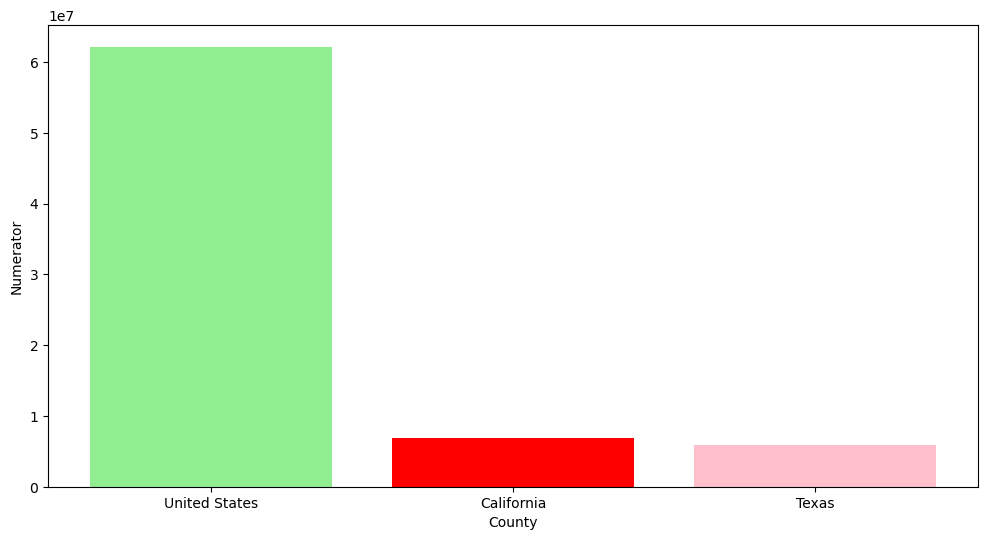

In [27]:
avg_numerator=df.groupby('County')['Numerator'].max()
avg1=avg_numerator.sort_values(ascending=False).head(3)
print("Average numerator value of a specific measures across all",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink'],width=0.8,label=avg1.index)
plt.xlabel('County')
plt.ylabel('Numerator')
plt.xticks()
plt.show()

3)What are the top 3 states name with highest numerator value?

Average Numerator value of a specific measures across all  State
US    62144711.0
CA     6829725.0
TX     5854743.0
Name: Numerator, dtype: float64


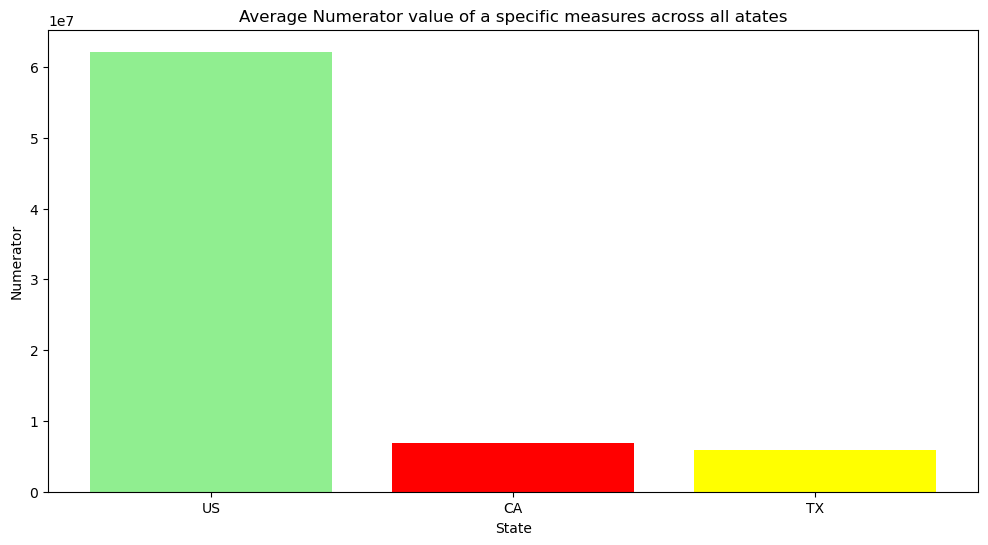

In [28]:
avg_numerator_state=df.groupby('State')['Numerator'].max()
avg1=avg_numerator_state.sort_values(ascending=False).head(3)
print("Average Numerator value of a specific measures across all ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','yellow'],width=0.8,label=avg1.index)
plt.title("Average Numerator value of a specific measures across all atates")
plt.xlabel('State')
plt.ylabel('Numerator')
plt.xticks()
plt.show()

###Temporal Analysis

4)What is average raw value for each year span?

Average Raw value of a specific measures across all ountries and years by Year span
1997-1999    7744.172964
2002-2004    7736.943533
2001-2003    7728.836329
Name: Raw value, dtype: float64


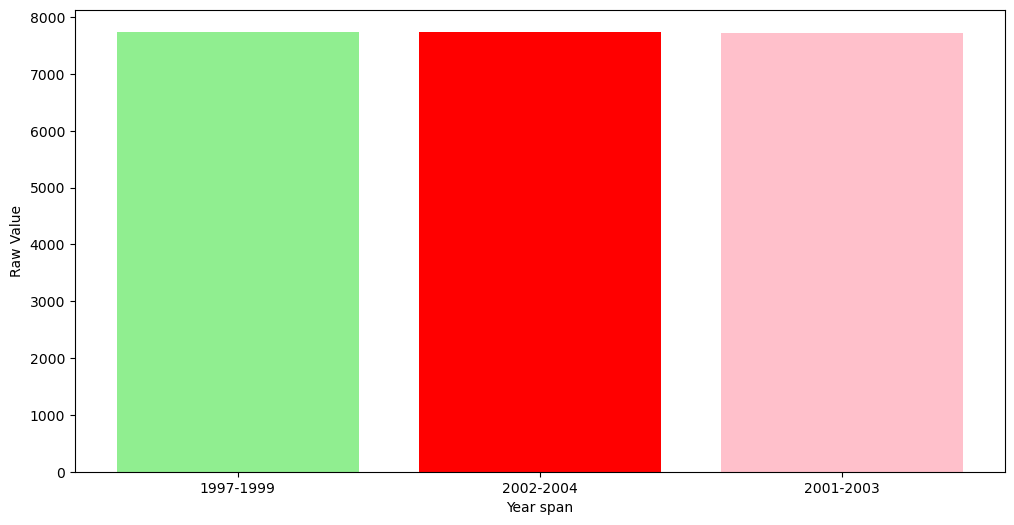

In [29]:
avg_raw_value=df.groupby('Year span')['Raw value'].mean()
avg1=avg_raw_value.sort_values(ascending=False).head(3)
print("Average Raw value of a specific measures across all ountries and years by",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','purple'],width=0.8,label=avg1.index)
plt.xlabel('Year span')
plt.ylabel('Raw Value')
plt.xticks()
plt.show()

###State Analysis

5)What is Maximum top 3 raw value for each state?

Average Raw value of a specific measures across all ountries and years by State
AK    32810.400
SD    32053.900
ND    25367.021
Name: Raw value, dtype: float64


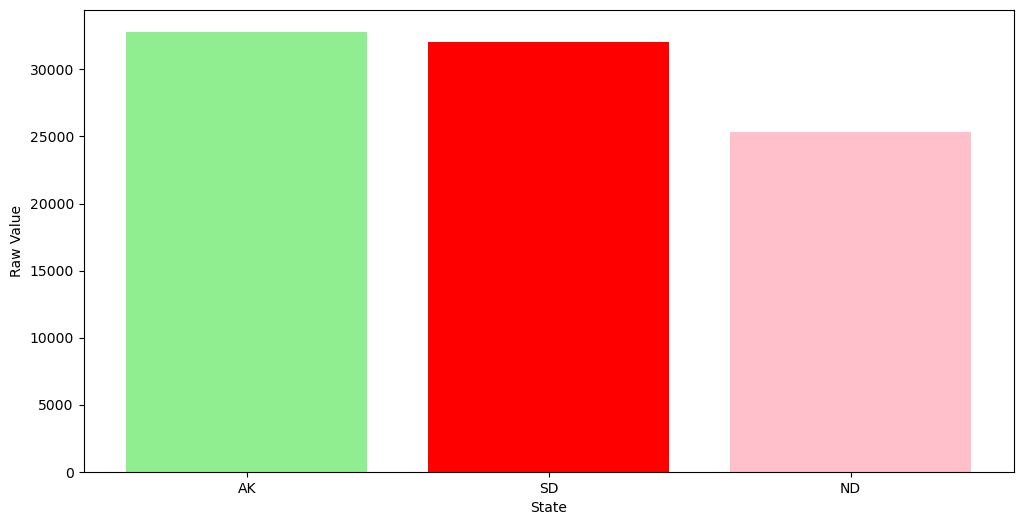

In [30]:
avg_raw_value=df.groupby('State')['Raw value'].max()
avg1=avg_raw_value.sort_values(ascending=False).head(3)
print("Average Raw value of a specific measures across all ountries and years by",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','purple'],width=0.8,label=avg1.index)
plt.xlabel('State')
plt.ylabel('Raw Value')
plt.xticks()
plt.show()

6)Calculate maximum count of top 5 states with specific confidence interval range?

Top 5 Confidence interval range by State
SD    23917.100
AK    22543.200
FL    20925.600
ND    20142.917
MD    17855.600
Name: Confidence Interval Lower Bound, dtype: float64


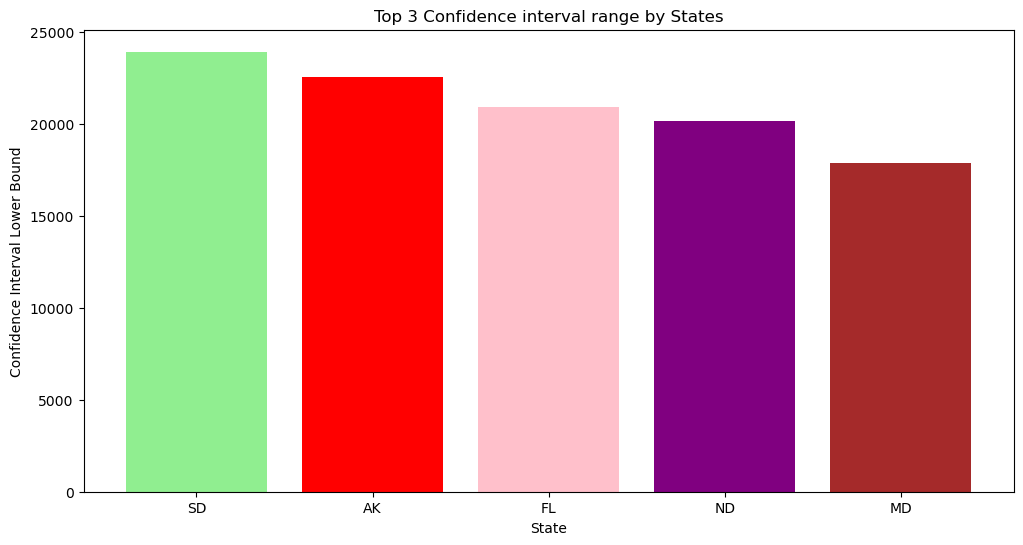

In [31]:
max_confidence=df.groupby('State')['Confidence Interval Lower Bound'].max()
avg1=max_confidence.sort_values(ascending=False).head(5)
print("Top 5 Confidence interval range by",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','purple','brown'],width=0.8,label=avg1.index)
plt.title("Top 3 Confidence interval range by States")
plt.xlabel('State')
plt.ylabel('Confidence Interval Lower Bound')
plt.xticks()
plt.show()

7)Calculate average count of Bottom 5 states with specific confidence interval upper bound range?

Top 5 Confidence interval range by States State
RI    794.790806
CT    786.461074
NE    754.074734
HI    719.823380
PR      0.000000
Name: Confidence Interval Upper Bound, dtype: float64


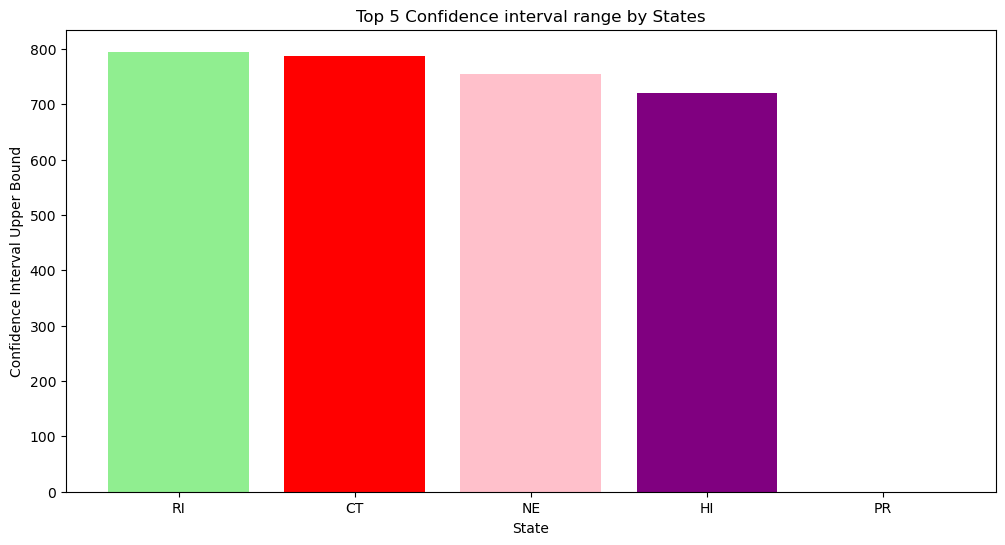

In [32]:
avg_confidence_interval_range=df.groupby('State')['Confidence Interval Upper Bound'].mean()
avg1=avg_confidence_interval_range.sort_values(ascending=False).tail(5)
print("Top 5 Confidence interval range by States",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','purple'],width=0.8,label=avg1.index)
plt.title("Top 5 Confidence interval range by States")
plt.xlabel('State')
plt.ylabel('Confidence Interval Upper Bound')
plt.xticks()
plt.show()

8)Calculate the maximum count of top 2 states with data release year?

Top 2 Data release year for each  State
MT    2014.0
PR    2014.0
ND    2014.0
Name: Data Release Year, dtype: float64


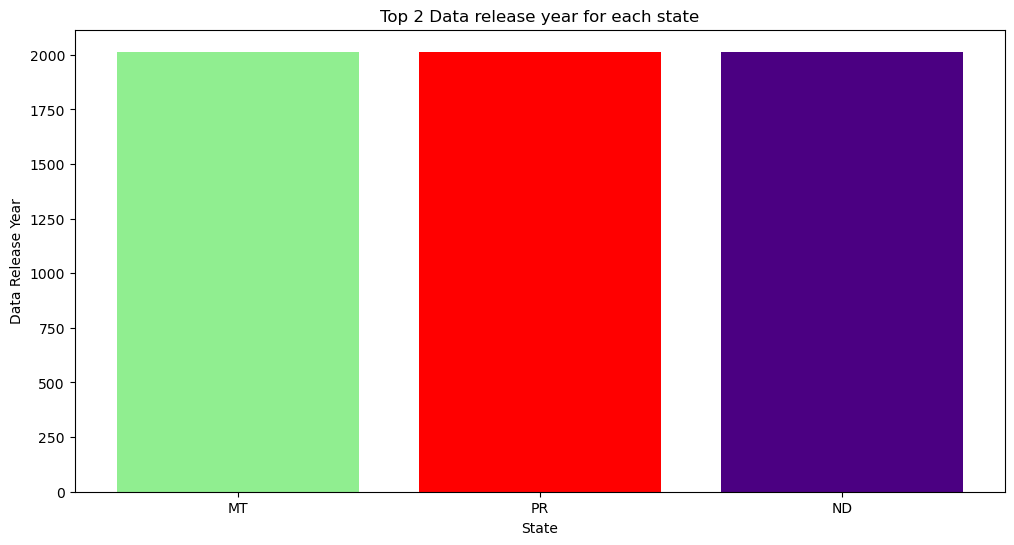

In [33]:
avg_data_release=df.groupby('State')['Data Release Year'].max()
avg1=avg_data_release.sort_values(ascending=False).head(3)
print("Top 2 Data release year for each ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','indigo'],width=0.8,label=avg1.index)
plt.title("Top 2 Data release year for each state")
plt.xlabel('State')
plt.ylabel('Data Release Year')
plt.xticks()
plt.show()

###Data Overview

9)How many different measures are reported in the dataset?

Count of different  Children in poverty                41499
Premature Death                    38312
Unemployment                       35202
Daily fine particulate matter      28728
Violent crime rate                 22351
Physical inactivity                22351
Adult obesity                      22351
Diabetic screening                 19159
Mammography screening              19159
Preventable hospital stays         19159
Uninsured                          19156
Sexually transmitted infections    15963
0                                    474
Name: Measure name, dtype: int64


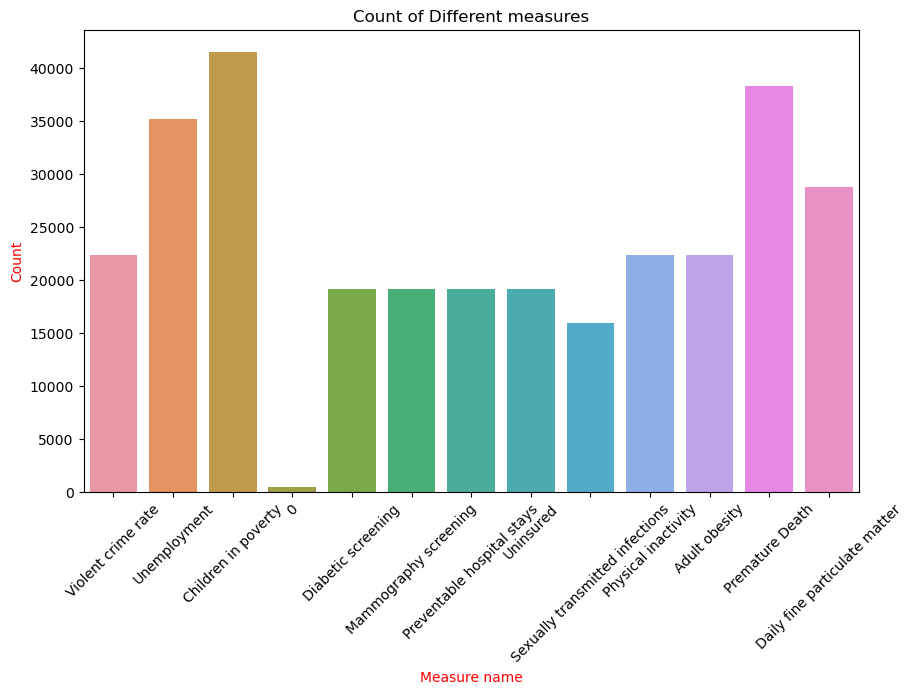

In [14]:
total=df['Measure name'].value_counts()
print("Count of different ",total)

plt.figure(figsize=(10,6))
sns.countplot(x='Measure name',data=df)
plt.title('Count of Different measures')
plt.xlabel('Measure name',color='Red')
plt.ylabel("Count",color='Red')
plt.xticks(rotation=45)
plt.show()



###Country Analysis

10)Calculate maximum count of top 3 confidence interval range for specific country?

Top 3 Confidence interval range by County
Lake and Peninsula Borough    46148.3
Buffalo County                42793.6
Mellette County               39465.1
Name: Confidence Interval Upper Bound, dtype: float64


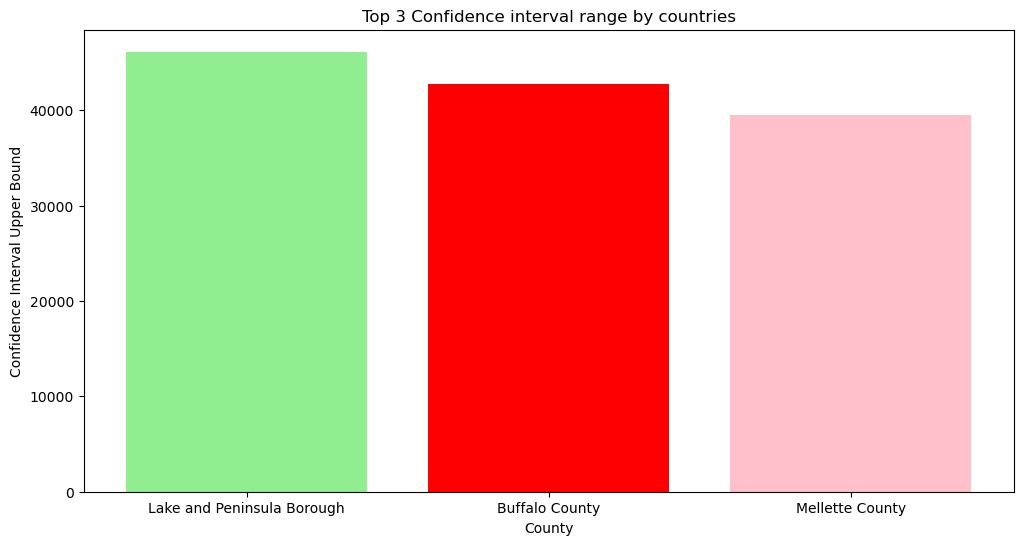

In [34]:
max_confidence=df.groupby('County')['Confidence Interval Upper Bound'].max()
avg1=max_confidence.sort_values(ascending=False).head(3)
print("Top 3 Confidence interval range by",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink'],width=0.8,label=avg1.index)
plt.title("Top 3 Confidence interval range by countries")
plt.xlabel('County')
plt.ylabel('Confidence Interval Upper Bound')
plt.xticks()
plt.show()

11)Calculate the maximum count of top 2 countries with data release year?

Top 2 data release year for each  County
Lancaster County    2014.0
Ontario County      2014.0
Name: Data Release Year, dtype: float64


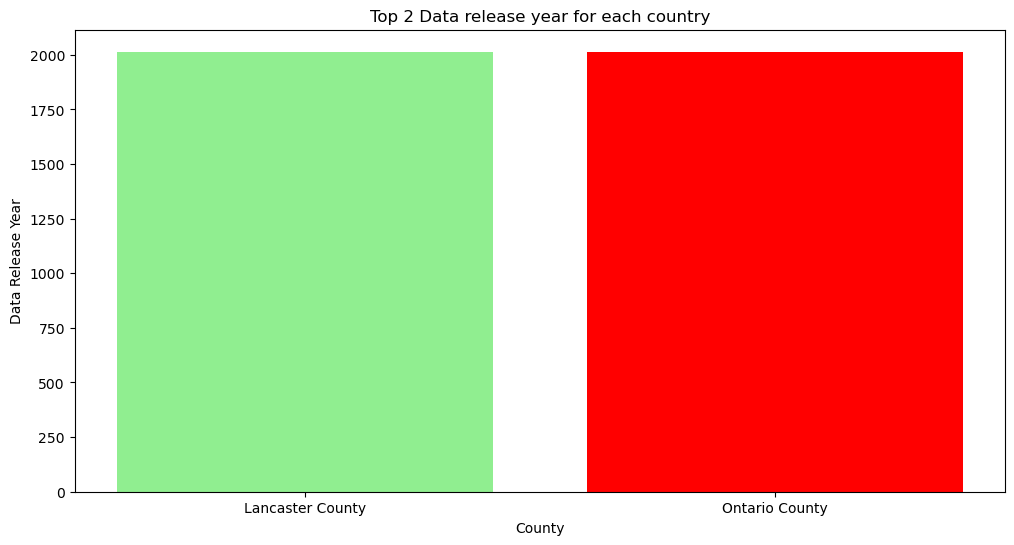

In [35]:
avg_data_release=df.groupby('County')['Data Release Year'].max()
avg1=avg_data_release.sort_values(ascending=False).head(2)
print("Top 2 data release year for each ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red'],width=0.8,label=avg1.index)
plt.title("Top 2 Data release year for each country")
plt.xlabel('County')
plt.ylabel('Data Release Year')
plt.xticks()
plt.show()

12)Calculate the count of top 10 measure id with the help of country name?

 Distribution of top 10 Measure id with the help  County
Washington County    2850
Jefferson County     2375
Franklin County      2280
Jackson County       2185
Lincoln County       2185
Madison County       1805
Clay County          1710
Montgomery County    1710
Marion County        1615
Monroe County        1615
Name: Measure id, dtype: int64


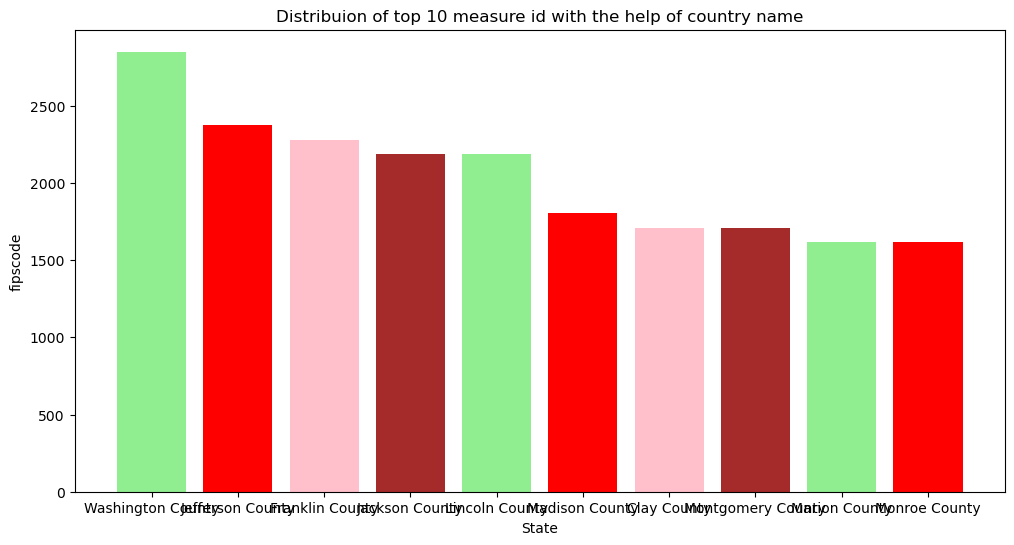

In [36]:
max_fipscode=df.groupby('County')['Measure id'].count()
avg1=max_fipscode.sort_values(ascending=False).head(10)
print(" Distribution of top 10 Measure id with the help ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','brown'],width=0.8,label=avg1.index)
plt.title("Distribuion of top 10 measure id with the help of country name")
plt.xlabel('State')
plt.ylabel('fipscode')
plt.xticks()
plt.show()

###FIPSCODE Analysis

13)Calculate maximum count of bottom 5 fipscode with sepcific country name?

Bottom 5 Fipscode with the help of  County
Chilton County    1021.0
Bullock County    1011.0
Autauga County    1001.0
Alabama           1000.0
United States        0.0
Name: fipscode, dtype: float64


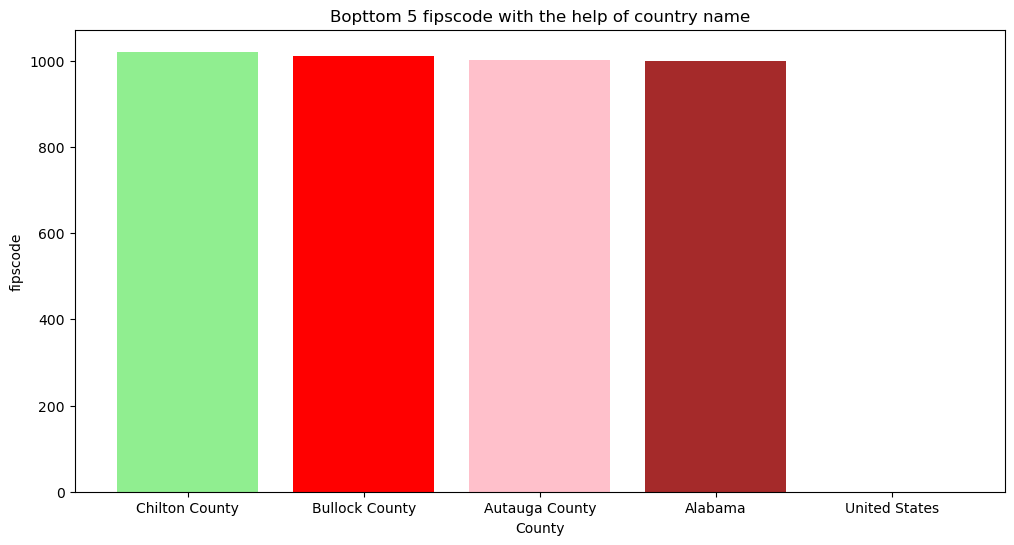

In [37]:
max_fipscode=df.groupby('County')['fipscode'].max()
avg1=max_fipscode.sort_values(ascending=False).tail(5)
print("Bottom 5 Fipscode with the help of ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','brown'],width=0.8,label=avg1.index)
plt.title("Bopttom 5 fipscode with the help of country name")
plt.xlabel('County')
plt.ylabel('fipscode')
plt.xticks()
plt.show()

14)Calculate maximum count of top 3 fipscode with sepcific state name?

Top 3 Fipscode with the help of  State
PR    72153.0
WY    56045.0
WI    55141.0
Name: fipscode, dtype: float64


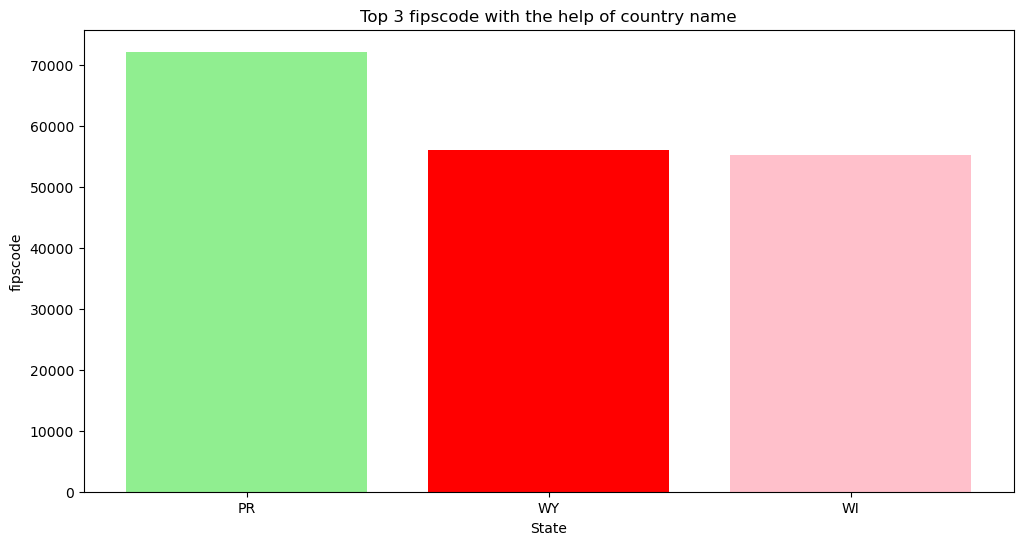

In [38]:
max_fipscode=df.groupby('State')['fipscode'].max()
avg1=max_fipscode.sort_values(ascending=False).head(3)
print("Top 3 Fipscode with the help of ",avg1)

plt.figure(figsize=(12,6))
plt.bar(avg1.index,avg1.values,color=['lightgreen','red','pink','brown'],width=0.8,label=avg1.index)
plt.title("Top 3 fipscode with the help of country name")
plt.xlabel('State')
plt.ylabel('fipscode')
plt.xticks()
plt.show()

###Measure Analysis

15)Calculate average numerator value of specific measures?

Average Numerator value of a specific   Measure name
Sexually transmitted infections    602683251.0
Violent crime rate                 302421001.3
Uninsured                          263691942.0
Name: Denominator, dtype: float64


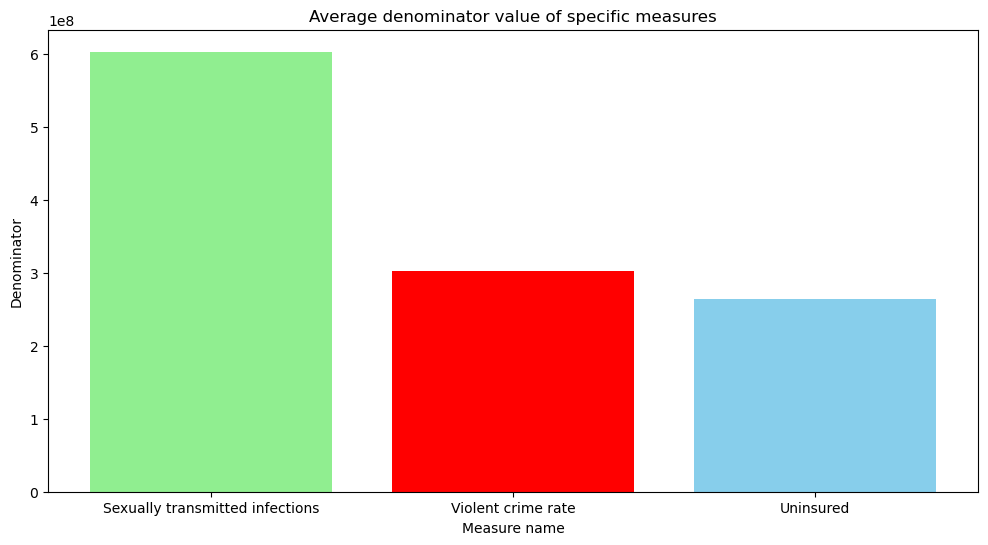

In [26]:
avg_denominator=df.groupby('Measure name')['Denominator'].max()
avg2=avg_denominator.sort_values(ascending=False).head(3)
print("Average Numerator value of a specific  ",avg2)

plt.figure(figsize=(12,6))
plt.bar(avg2.index,avg2.values,color=['lightgreen','red','skyblue'],width=0.8,label=avg2.index)
plt.title("Average denominator value of specific measures")
plt.xlabel('Measure name')
plt.ylabel('Denominator')
plt.xticks()
plt.show()